In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans
from sklearn.datasets import make_blobs


In [3]:
wine = pd.read_csv("D:\\360Assignments\\Submission\\10 PCA\\wine.csv")
wine.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
#To normalize the data 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

df_norm = norm_func(wine)

In [5]:
# Storing the Total With SS of each cluster  and plotting elbow curve of TWSS
# No.of clusters = TWSS point on curve

In [6]:
TWSS = []
k = list(range(1,15 ))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[122.17959396448587,
 74.87017441238335,
 49.849181367996465,
 45.19020800100908,
 42.83350829599073,
 40.767650905725645,
 38.601371314774056,
 36.871695940255755,
 35.44450875380175,
 33.3225618130903,
 32.331442932923906,
 31.46404927632991,
 29.835432109433988,
 29.37730486288443]

# Total within ss of each cluster (15) is obtained ,Now to plot the scree plot.

Text(0, 0.5, 'total_within_SS')

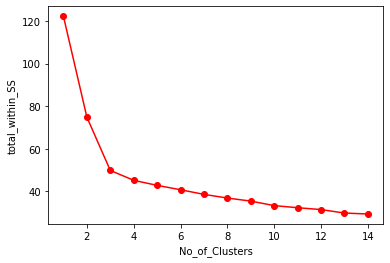

In [7]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [8]:
# elbow curve descents at k=3

model = KMeans(n_clusters = 3)
model.fit(df_norm)
y_kmeans = model.predict(df_norm) # prediction
#each clusters number
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [10]:
#to know the centers (centroid) of each clusters w.r.t to each col in wine data
model.cluster_centers_

array([[0.00833333, 0.71109649, 0.25      , 0.58716578, 0.34295533,
        0.4009058 , 0.64408046, 0.55713783, 0.29937107, 0.4701367 ,
        0.35938567, 0.47655827, 0.69358974, 0.59595816],
       [0.98979592, 0.55832438, 0.5147213 , 0.57470261, 0.55869977,
        0.31543922, 0.24074595, 0.09661586, 0.60531382, 0.23755875,
        0.51734345, 0.16741331, 0.15392091, 0.24932312],
       [0.5       , 0.32295957, 0.23093888, 0.46981322, 0.4878231 ,
        0.26134216, 0.43883058, 0.36629365, 0.43833744, 0.38348649,
        0.15170401, 0.46808059, 0.55539629, 0.16749364]])

In [12]:
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


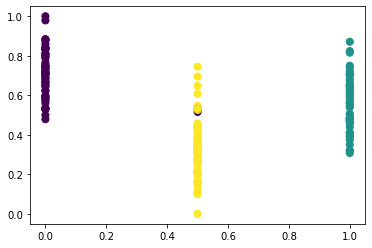

In [11]:
plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
# Plotting a scatter plot for Type of Wine and its Alcohol content

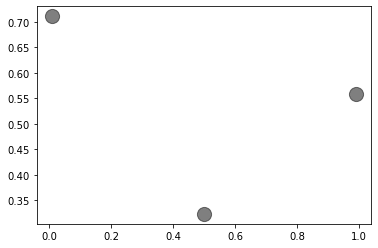

In [13]:
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);